In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Loading the mnist data set
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Lets have a look at the data points in X_train and X_test
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train = X_train/255 # Normalizing
X_test = X_test/255

In [6]:
model = tf.keras.Sequential() # Creating a Sequential Model

In [7]:
model.add(keras.layers.Flatten(input_shape = [28, 28])) # adding the first flatten layer of neurons for the input of data
model.add(keras.layers.Dense(300, activation = "relu")) # adding the dense layers with diff activation functions
model.add(keras.layers.Dense(100, activation = 'tanh'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
# this is the output layer with 10 neurons for eact class with softmax activation function

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
history = model.fit(X_train, y_train,  epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1934 - accuracy: 0.9429 - val_loss: 0.0981 - val_accuracy: 0.9680
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0803 - accuracy: 0.9754 - val_loss: 0.0753 - val_accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0529 - accuracy: 0.9832 - val_loss: 0.0700 - val_accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0731 - val_accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0734 - val_accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0804 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0210 - accuracy: 0.9923 - val_loss: 0.0769 - val_accuracy

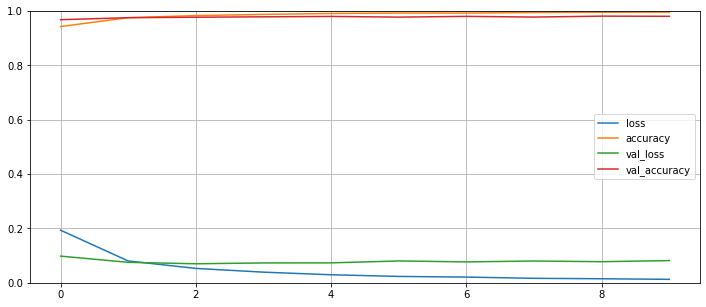

In [11]:
pd.DataFrame(history.history).plot(figsize=(12, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
y_pred = model.predict(X_test)

In [13]:
y_pred

array([[6.82363166e-10, 8.14510592e-09, 3.41823387e-08, ...,
        9.99998212e-01, 3.19206279e-08, 1.32433365e-06],
       [7.80869527e-07, 1.25994779e-06, 9.99995112e-01, ...,
        2.71166911e-09, 6.56442808e-07, 3.10221931e-10],
       [1.27477051e-09, 9.99997735e-01, 3.53490577e-07, ...,
        8.33212880e-07, 4.82004566e-07, 7.73535513e-10],
       ...,
       [2.60776860e-12, 5.21997876e-08, 8.49377096e-11, ...,
        4.21186570e-07, 6.39419717e-09, 2.75354012e-07],
       [1.17633220e-07, 1.27380462e-09, 3.02833003e-09, ...,
        3.59258845e-10, 5.66973526e-04, 5.37975831e-10],
       [4.34427648e-06, 1.01986850e-10, 1.42101886e-08, ...,
        1.00421355e-11, 3.72183599e-08, 2.49069854e-09]], dtype=float32)

Model.predict will give us the probability of classes that are present in the data set, Our optimal answer will be the class with highest probability.

In [14]:
# np.argmax will provode us the highest value.
y_pred = [np.argmax(i) for i in y_pred]

In [15]:
# Lets hav a look at the confusion matrix.
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    1,    0,    2,    1,    1,    2,    0],
       [   5, 1121,    4,    0,    0,    0,    2,    1,    2,    0],
       [   4,    0, 1013,    3,    2,    0,    1,    3,    6,    0],
       [   2,    0,    6,  989,    0,    2,    0,    4,    2,    5],
       [   2,    0,    2,    1,  966,    0,    2,    1,    1,    7],
       [   3,    0,    0,    8,    1,  870,    4,    0,    3,    3],
       [   3,    2,    0,    1,    5,    5,  938,    0,    4,    0],
       [   1,    3,    8,    2,    1,    0,    0, 1003,    6,    4],
       [   5,    0,    1,    2,    5,    0,    0,    2,  957,    2],
       [   2,    2,    1,    4,    9,    2,    0,    8,    6,  975]])>

Text(69.0, 0.5, 'True Values')

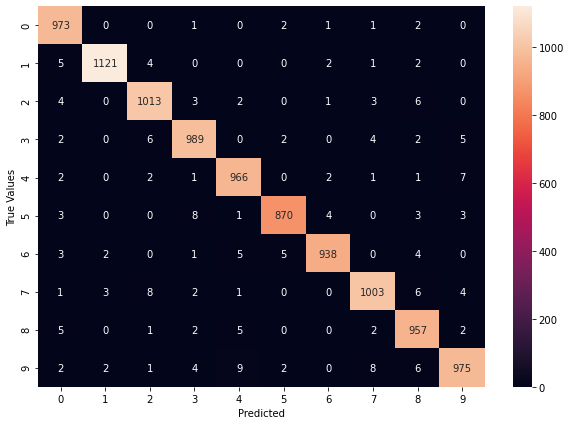

In [16]:
import seaborn as sns
# Heat Map
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot =True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("True Values")

In [17]:
# Lets check for accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9805